In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sqlite3
import os
import glob

sys.path.insert(0, '/home/nsryan/Desktop/arfc/transition-scenarios/scripts')
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]
plt.rcParams.update({'font.size': 15})

In [3]:
import cymetric as cym
import transition_metrics as tm
import dataframe_analysis as dta
#import transition_plots as tp # requires pyne

import waste_calcs

In [3]:
current_outfile = 'input_files/us_facilities_lwr.sqlite'

## Reactor Deployment

In [4]:
current_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
#mmr_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
#             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
#             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
#             'MMR_enter','MMR_exit']
#xe_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
#             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
#             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
#             'Xe-100_enter', 'Xe-100_exit']

In [5]:
current_reactors = tm.get_lwr_totals(current_outfile, current_nonlwr)
current_reactors = dta.add_year(current_reactors)

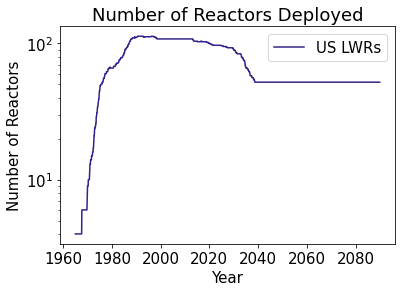

In [6]:
# Plot the numeber of reactors deployed

#plt.figure(figsize=(7,4))
plt.plot(current_reactors['Year'], current_reactors['lwr_total'], label='US LWRs', color=mycolors[0])
#plt.plot(mmr_nogrowth_reactors['Year'], mmr_nogrowth_reactors['mmr_total'], 'tab:purple',
#         label=r'USNC MMR$^{TM}$, Scenario 2')
#plt.plot(xe_nogrowth_reactors['Year'], xe_nogrowth_reactors['xe_total'],
#         'tab:orange', label='X-energy Xe-100, Scenrio 3')
#plt.plot(mmr_1percent_reactors['Year'], mmr_1percent_reactors['mmr_total'],
#         'r', label='USNC MMR$^{TM}$, Scenario 4')
#plt.plot(xe_1percent_reactors['Year'], xe_1percent_reactors['xe_total'],
#         'g', label='X-energy Xe-100, Scenrio 5')
plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.yscale('log')
plt.legend()

## Energy Output

In [10]:
current_energy = tm.get_annual_electricity(current_outfile)

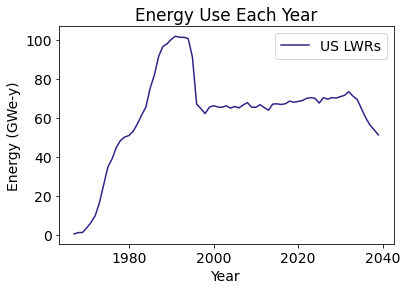

In [13]:
# Plot the yearly energy

time = np.linspace(2025,2089, 65)

#plt.figure(figsize=(7,4))
plt.plot(current_energy['Year'], current_energy['Energy'], label='US LWRs', color=mycolors[0])
#plt.plot(mmr_nogrowth_energy['Year'], mmr_nogrowth_energy['Energy'],
#         'tab:purple', label='Scenario 2')
#plt.plot(xe_nogrowth_energy['Year'], xe_nogrowth_energy['Energy'],
#         'tab:orange', label='Scenario 3')
#plt.plot(mmr_1percent_energy['Year'], mmr_1percent_energy['Energy'],
#         'r', label='Scenario 4')
#plt.plot(xe_1percent_energy['Year'], xe_1percent_energy['Energy'],
#         'g', label='Scenario 5')

plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()

### Energy Produced by Reactor Type

Text(0.5, 0, 'Year')

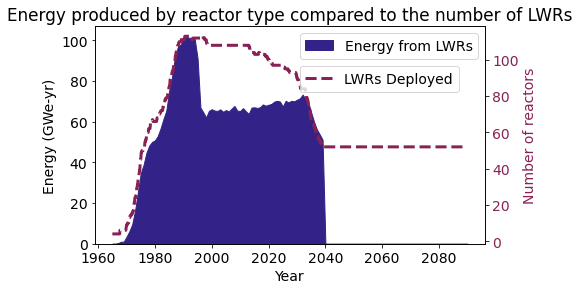

In [14]:
lwr_energy = tm.get_lwr_energy(current_outfile, ['MMR'])

fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)
ax1.stackplot(lwr_energy['Year'], lwr_energy['Energy'], labels=['Energy from LWRs'], color=mycolors[0])
ax1.legend()
ax1.set_ylabel('Energy (GWe-yr)')

ax2 = ax1.twinx()
ax2.plot(current_reactors['Year'], current_reactors['lwr_total'], color=mycolors[7],
         linestyle='--', linewidth=3, label='LWRs Deployed')
ax2.legend(loc=(0.525, 0.7))
ax2.set_ylabel('Number of reactors', color=mycolors[7])
ax2.tick_params(axis='y', labelcolor=mycolors[7])

plt.title('Energy produced by reactor type compared to the number of LWRs')
ax1.set_xlabel('Year')

## Energy Input

## Material Transactions
You can use:
```
sqlite3 -header -csv $database.sqlite "select * from $table;" > $table.csv
```
to create a csv from a sqlite database, but add_reciever_prototype is how you get transactions_df, that can be very unclear from the docstrings.

In [15]:
current_transactions = tm.add_receiver_prototype(current_outfile)

In [16]:
current_uox = dta.commodity_mass_traded(current_transactions, 'fresh_uox')

Text(0.5, 1.0, 'Yearly Mass of uranium supplied to all reactors')

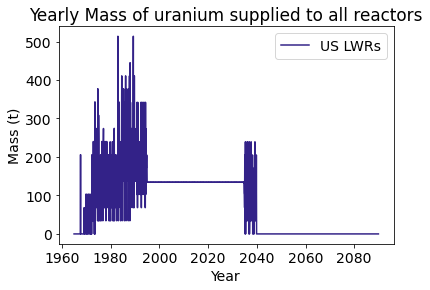

In [19]:
# Comparing fresh_uox transactions to all reactors
plt.figure()

plt.plot(current_uox['Year'], current_uox['Quantity']/1000,
         label='US LWRs', color=mycolors[0])
#plt.plot(mmr_1percent_uox['Year'], mmr_1percent_uox['Quantity']/1000,
#         'r', label='Scenario 4')
#plt.plot(mmr_nogrowth_uox['Year'], mmr_nogrowth_uox['Quantity']/1000,
#          'tab:purple', label='Scenario 2')
#plt.plot(xe_1percent_uox['Year'], xe_1percent_uox['Quantity']/1000,
#          'g', label='Scenario 5')
#plt.plot(xe_nogrowth_uox['Year'], xe_nogrowth_uox['Quantity']/1000,
#          'tab:orange', label='Scenario 3')
plt.legend() #(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.title('Yearly Mass of uranium supplied to all reactors')

Text(0.5, 1.0, 'Cumulative Mass of uranium supplied to all reactors')

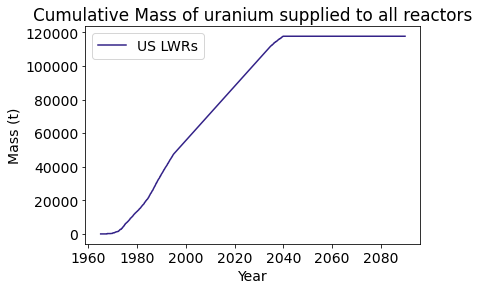

In [20]:
plt.figure()
plt.plot(current_uox['Year'], current_uox['Quantity'].cumsum()/1000,
         label='US LWRs', color=mycolors[0])
#plt.plot(mmr_1percent_uox['Year'], mmr_1percent_uox['Quantity'].cumsum()/1000,
#         'r', label='Scenario 4')
#plt.plot(mmr_nogrowth_uox['Year'], mmr_nogrowth_uox['Quantity'].cumsum()/1000,
#          'tab:purple', label='Scenario 2')
#plt.plot(xe_1percent_uox['Year'], xe_1percent_uox['Quantity'].cumsum()/1000,
#          'g', label='Scenario 5')
#plt.plot(xe_nogrowth_uox['Year'], xe_nogrowth_uox['Quantity'].cumsum()/1000,
#          'tab:orange', label='Scenario 3')
plt.legend(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.title('Cumulative Mass of uranium supplied to all reactors')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [21]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
x_f = 0.00711
x_t = 0.002

In [22]:
current_tails = dta.calculate_tails(current_uox['Quantity'], leu_p, x_t, x_f)
current_feed = dta.calculate_feed(current_uox['Quantity'], current_tails)
current_swu = dta.calculate_SWU(current_uox['Quantity'], leu_p,
                               current_tails, x_t,
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu = dta.add_year(current_swu)

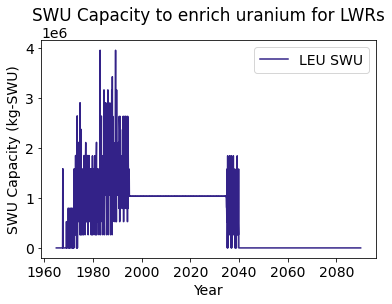

In [23]:
plt.plot(current_swu['Year'], current_swu['SWU'], label='LEU SWU', color=mycolors[0])

plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
title = plt.title('SWU Capacity to enrich uranium for LWRs', pad=20)
plt.legend()

# 480 Project


In [37]:
npre480_outfile = 'input_files/npre480.sqlite'

npre480_lwr = ['Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'NuclearRepository', 'United States Nuclear',
                'FuelCycle', 'LWReactors']

npre480_xe = ['Mine', 'Mill', 'Conversion',
             'Enrichment', 'FuelFab', 'NuclearRepository', 'United States Nuclear',
             'FuelCycle', 'Xe-100',
             'Xe-100_enter', 'Xe-100_exit']

npre480_reactors = tm.get_lwr_totals(npre480_outfile, npre480_lwr)
npre480_reactors = dta.add_year(npre480_reactors)

npre480_xe_reactors = tm.get_lwr_totals(npre480_outfile, npre480_xe)
npre480_xe_reactors = dta.add_year(npre480_xe_reactors)

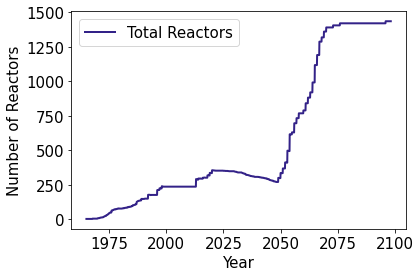

In [38]:
# Plot the numeber of reactors deployed

plt.plot(npre480_reactors['Year'], npre480_reactors['lwr_total'], label='Total Reactors', color=mycolors[0], linewidth='2')
#plt.plot(npre480_xe_reactors['Year'], npre480_xe_reactors['xe_total'],
#         color=mycolors[2], label='X-energy Xe-100, Scenrio 5')
#plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
#plt.yscale('log')
plt.legend()
plt.savefig('num_reactors_tot.pdf', bbox_inches='tight')

In [39]:
npre480_energy = tm.get_annual_electricity(npre480_outfile)

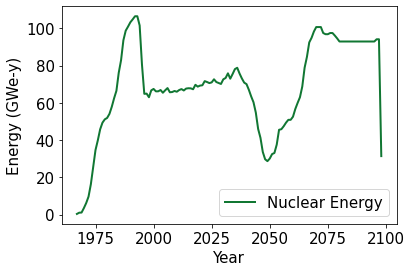

In [40]:
time = np.linspace(1967,2098, 132)

#plt.figure(figsize=(7,4))
plt.plot(npre480_energy['Year'], npre480_energy['Energy'], label='Nuclear Energy', color=mycolors[1], linewidth='2')
#plt.plot(mmr_nogrowth_energy['Year'], mmr_nogrowth_energy['Energy'],
#         'tab:purple', label='Scenario 2')
#plt.plot(xe_nogrowth_energy['Year'], xe_nogrowth_energy['Energy'],
#         'tab:orange', label='Scenario 3')
#plt.plot(mmr_1percent_energy['Year'], mmr_1percent_energy['Energy'],
#         'r', label='Scenario 4')
#plt.plot(xe_1percent_energy['Year'], xe_1percent_energy['Energy'],
#         'g', label='Scenario 5')

#plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()

#plt.savefig('yearly_energy_use.pdf', bbox_inches='tight')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [41]:
npre480_transactions = tm.add_receiver_prototype(npre480_outfile)
npre480_uox = dta.commodity_mass_traded(npre480_transactions, 'fresh_uox')

In [42]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
x_f = 0.00711
x_t = 0.002

In [43]:
npre480_tails = dta.calculate_tails(npre480_uox['Quantity'], leu_p, x_t, x_f)
npre480_feed = dta.calculate_feed(npre480_uox['Quantity'], npre480_tails)
npre480_swu = dta.calculate_SWU(npre480_uox['Quantity'], leu_p,
                               npre480_tails, x_t,
                               npre480_feed, x_f)
npre480_swu = npre480_swu.to_frame().reset_index()
npre480_swu = npre480_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
npre480_swu = dta.add_year(npre480_swu)

the maximum swu is 3975743.9226184934


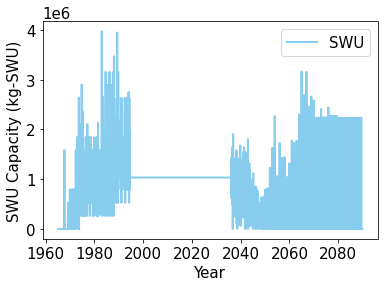

In [44]:
plt.plot(npre480_swu['Year'], npre480_swu['SWU'], label='SWU', color=mycolors[3], linewidth='2')

plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
#title = plt.title('SWU Capacity', pad=18)
#plt.xlim(2015,2020)
plt.legend()
print('the maximum swu is',npre480_swu['SWU'].max())
plt.savefig('total_swu.pdf', bbox_inches='tight')

In [45]:
npre480_swu['SWU'][700] - npre480_swu['SWU'][500]

0.0

In [46]:
swu_array = npre480_swu['SWU'].values
us_only_swu = swu_array.copy()
foregin_only_swu = swu_array.copy()

us_major60_swu = swu_array.copy()
us_minor40_swu = swu_array.copy()

foregin_major60_swu = swu_array.copy()
foregin_minor40_swu = swu_array.copy()

for i in range(len(us_major60_swu)):
    us_major60_swu[i] = us_major60_swu[i] * 0.6
    us_minor40_swu[i] = us_minor40_swu[i] * 0.4

    foregin_major60_swu[i] = foregin_major60_swu[i] * 0.6
    foregin_minor40_swu[i] = foregin_minor40_swu[i] * 0.4

In [47]:
type(npre480_swu['SWU'])

pandas.core.series.Series

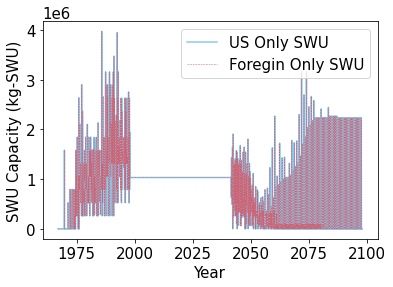

In [48]:
times = np.linspace(1967,2098,1500)
plt.plot(times, us_only_swu, color=mycolors[3], label='US Only SWU')
plt.plot(times, foregin_only_swu, '--', color=mycolors[5], linewidth=0.5, label='Foregin Only SWU')
plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
plt.legend()

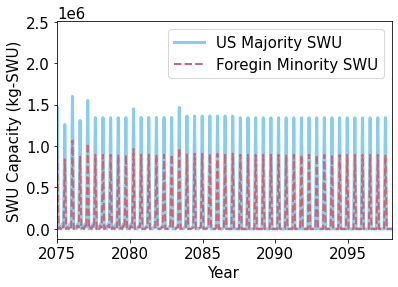

In [49]:
plt.plot(times, us_major60_swu, color=mycolors[3], label='US Majority SWU', linewidth=3)
plt.plot(times, foregin_minor40_swu, '--', color=mycolors[5], linewidth=2, label='Foregin Minority SWU')
plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')

plt.xlim(2075,2098)

plt.legend()
#plt.savefig('zoomed_us_maj_swu.pdf', bbox_inches='tight')

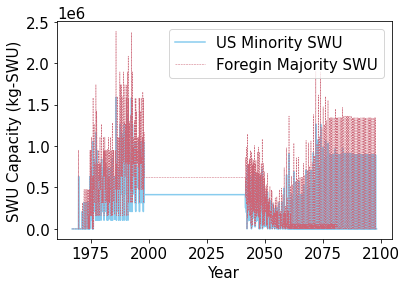

In [50]:
plt.plot(times, us_minor40_swu, color=mycolors[3], label='US Minority SWU')
plt.plot(times, foregin_major60_swu, '--', color=mycolors[5], linewidth=0.5, label='Foregin Majority SWU')
plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
plt.legend()
#plt.savefig('us_min_swu.pdf', bbox_inches='tight')

In [51]:
replacement_reactors = {1976: 13,
 1987: 15,
 1989: 10,
 1992: 28,
 1996: 35,
 1997: 13,
 1998: 16,
 2013: 55,
 2014: 8,
 2016: 7,
 2018: 17,
 2019: 19,
 2020: 21,
 2049: 31,
 2050: 37,
 2051: 34,
 2052: 44,
 2053: 87,
 2054: 122,
 2055: 15,
 2056: 67,
 2057: 37,
 2058: 35,
 2060: 21,
 2061: 52,
 2062: 41,
 2063: 38,
 2064: 72,
 2065: 126,
 2066: 73,
 2067: 97,
 2068: 31,
 2069: 42,
 2070: 30,
 2073: 15,
 2076: 15,
 2096: 15}

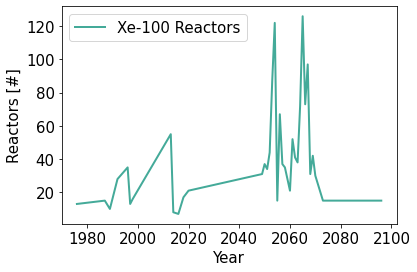

In [52]:
plt.plot(replacement_reactors.keys(),replacement_reactors.values(), color=mycolors[2], label='Xe-100 Reactors', linewidth='2')
plt.ylabel('Reactors [#]')
plt.xlabel('Year')
plt.legend()
#plt.savefig('num_xe100s_deployed.pdf', bbox_inches='tight')

In [53]:
sum(replacement_reactors.values())

1434

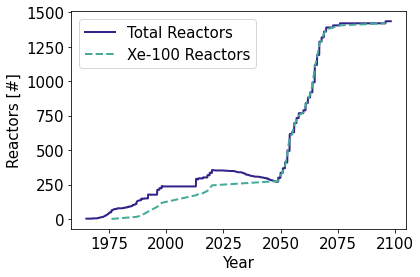

In [54]:
cumulative_reactors = [0]
for ind in range(1,len(list(replacement_reactors.values()))):
    cumulative_reactors.append(list(replacement_reactors.values())[ind] + cumulative_reactors[ind-1])

plt.plot(npre480_reactors['Year'], npre480_reactors['lwr_total'], label='Total Reactors', color=mycolors[0], linewidth='2')
plt.plot(replacement_reactors.keys(),cumulative_reactors, color=mycolors[2], label='Xe-100 Reactors', linewidth='2', linestyle='--')
plt.ylabel('Reactors [#]')
plt.xlabel('Year')
plt.legend()
#plt.savefig('num_xe100s_deployed_cumulative.pdf', bbox_inches='tight')

In [55]:
list(replacement_reactors.values())

[13,
 15,
 10,
 28,
 35,
 13,
 16,
 55,
 8,
 7,
 17,
 19,
 21,
 31,
 37,
 34,
 44,
 87,
 122,
 15,
 67,
 37,
 35,
 21,
 52,
 41,
 38,
 72,
 126,
 73,
 97,
 31,
 42,
 30,
 15,
 15,
 15]

# Waste

In [56]:
npre480_uf6 = dta.commodity_mass_traded(npre480_transactions, 'uf6')
npre480_enr_u = dta.commodity_mass_traded(npre480_transactions, 'enr_u')
npre480_nat_u = dta.commodity_mass_traded(npre480_transactions, 'nat_u')
npre480_tails = dta.commodity_mass_traded(npre480_transactions, 'tails')

npre480_fresh_uox = dta.commodity_mass_traded(npre480_transactions, 'fresh_uox')
npre480_spent_uox = dta.commodity_mass_traded(npre480_transactions, 'spent_uox')
npre480_spent_haleu = dta.commodity_mass_traded(npre480_transactions, 'spent_haleu')

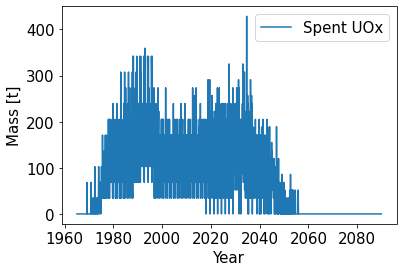

In [57]:
plt.plot(npre480_spent_uox['Year'], npre480_spent_uox['Quantity']/1000, label='Spent UOx')
#plt.plot(npre480_fresh_uox['Year'], npre480_fresh_uox['Quantity']/1000, label='Fresh UOx')
#plt.plot(npre480_spent_haleu['Year'], npre480_spent_haleu['Quantity']/1000, label='Spent HALEU')

#plt.plot(npre480_tails['Year'], npre480_tails['Quantity']/1000, label='Tails')
#plt.plot(npre480_uf6['Year'], npre480_uf6['Quantity']/1000, label='UF6')
#plt.plot(npre480_enr_u['Year'], npre480_enr_u['Quantity']/1000, label='Enriched U')
#plt.plot(npre480_nat_u['Year'], npre480_nat_u['Quantity']/1000, label='Natural U')

plt.ylabel('Mass [t]')
plt.xlabel('Year')
plt.legend()

In [58]:
npre480_senders = tm.add_sender_prototype(npre480_outfile)
npre480_senders = dta.add_year(npre480_senders)

npre480_receivers = tm.add_receiver_prototype(npre480_outfile)
npre480_receivers = dta.add_year(npre480_receivers)

In [59]:
npre480_receivers

,SimId,TransactionId,SenderId,ReceiverId,ResourceId,Commodity,Time,ObjId,Quantity,Units,ReceiverPrototype,Year
0,ade94909-746d-4b06-be83-cf43278330ea,0,189,190,9,nat_u,0,8,1000000.000000,kg,Mill,1965.00
1,ade94909-746d-4b06-be83-cf43278330ea,1,189,190,18,nat_u,1,16,1000000.000000,kg,Mill,1965.08
2,ade94909-746d-4b06-be83-cf43278330ea,3,189,190,28,nat_u,2,25,1000000.000000,kg,Mill,1965.17
3,ade94909-746d-4b06-be83-cf43278330ea,5,189,190,38,nat_u,3,34,1000000.000000,kg,Mill,1965.25
4,ade94909-746d-4b06-be83-cf43278330ea,8,189,190,49,nat_u,4,44,1000000.000000,kg,Mill,1965.33
...,...,...,...,...,...,...,...,...,...,...,...,...
682164,ade94909-746d-4b06-be83-cf43278330ea,700554,189,190,5262817,nat_u,1597,4068699,1000000.000000,kg,Mill,2098.08
682165,ade94909-746d-4b06-be83-cf43278330ea,700555,192,193,5262830,enr_u,1598,4068710,134473.684211,kg,FuelFab,2098.17
682166,ade94909-746d-4b06-be83-cf43278330ea,700559,189,190,5262832,nat_u,1598,4068711,1000000.000000,kg,Mill,2098.17
682167,ade94909-746d-4b06-be83-cf43278330ea,700560,192,193,5262845,enr_u,1599,4068722,134473.684211,kg,FuelFab,2098.25


In [60]:
receiver_list = npre480_receivers['ReceiverPrototype'].drop_duplicates().tolist()
receiver_list

['Mill',
 'FuelFab',
 'HADDAM_NECK',
 'SAN_ONOFRE-1',
 'NuclearRepository',
 'OYSTER_CREEK',
 'NINE_MILE_POINT-1',
 'GINNA',
 'DRESDEN-2',
 'ROBINSON-2',
 'POINT_BEACH-1',
 'MILLSTONE-1',
 'MONTICELLO',
 'DRESDEN-3',
 'PALISADES',
 'QUAD_CITIES-1',
 'QUAD_CITIES-2',
 'SURRY-1',
 'PILGRIM-1',
 'POINT_BEACH-2',
 'VERMONT_YANKEE',
 'MAINE_YANKEE',
 'TURKEY_POINT-3',
 'SURRY-2',
 'OCONEE-1',
 'ZION-1',
 'INDIAN_POINT-2',
 'TURKEY_POINT-4',
 'FORT_CALHOUN-1',
 'BROWNS_FERRY-1',
 'OCONEE-2',
 'PRAIRIE_ISLAND-1',
 'ZION-2',
 'PEACH_BOTTOM-2',
 'KEWAUNEE',
 'COOPER',
 'DUANE_ARNOLD-1',
 'THREE_MILE_ISLAND-1',
 'PEACH_BOTTOM-3',
 'ANO-1',
 'BROWNS_FERRY-2',
 'OCONEE-3',
 'RANCHO_SECO-1',
 'HATCH-1',
 'CALVERT_CLIFFS-1',
 'PRAIRIE_ISLAND-2',
 'COOK-1',
 'FITZPATRICK',
 'BRUNSWICK-2',
 'MILLSTONE-2',
 'Xe-100-1',
 'TROJAN',
 'ST._LUCIE-1',
 'INDIAN_POINT-3',
 'BEAVER_VALLEY-1',
 'BROWNS_FERRY-3',
 'BRUNSWICK-1',
 'CALVERT_CLIFFS-2',
 'SALEM-1',
 'CRYSTAL_RIVER-3',
 'DAVIS_BESSE-1',
 'FARLEY-1',
 

In [61]:
# remove non-Reactor entries
non_reactors = ['Mill', 'FuelFab', 'NuclearRepository']
for elem in non_reactors:
    if elem in receiver_list:
        index = receiver_list.index(elem)
        receiver_list.remove(receiver_list[index])
    else:
        pass
len(receiver_list)

152

In [62]:
commodities = []
for com in npre480_transactions['Commodity']:
    if com in commodities:
        pass
    else:
        commodities.append(com)

In [63]:
reciever = []
for rec in npre480_transactions['ReceiverPrototype']:
    if rec in reciever:
        pass
    else:
        reciever.append(rec)

In [64]:
npre480_senders['SenderPrototype']

0               Mine
1               Mine
2               Mine
3               Mine
4               Mine
             ...    
682164          Mine
682165    Enrichment
682166          Mine
682167    Enrichment
682168          Mine
Name: SenderPrototype, Length: 682169, dtype: object

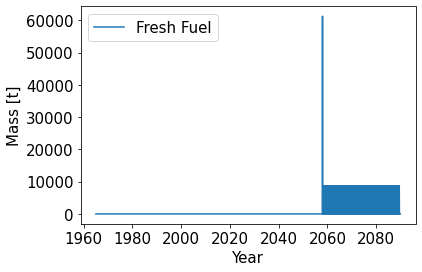

In [73]:
plt.plot(arrive_ar['Year'], arrive_ar['Quantity'], label='Fresh Fuel')

plt.ylabel('Mass [t]')
plt.xlabel('Year')
plt.legend()

In [74]:
leave_fuelfab

,SimId,TransactionId,SenderId,ReceiverId,ResourceId,Commodity,Time,ObjId,Quantity,Units,SenderPrototype,Year
60,ade94909-746d-4b06-be83-cf43278330ea,147,193,197,1434,fresh_uox,32,1344,427.385892,kg,FuelFab,1967.67
61,ade94909-746d-4b06-be83-cf43278330ea,148,193,197,1437,fresh_uox,32,1345,427.385892,kg,FuelFab,1967.67
62,ade94909-746d-4b06-be83-cf43278330ea,149,193,197,1440,fresh_uox,32,1346,427.385892,kg,FuelFab,1967.67
63,ade94909-746d-4b06-be83-cf43278330ea,150,193,197,1443,fresh_uox,32,1347,427.385892,kg,FuelFab,1967.67
64,ade94909-746d-4b06-be83-cf43278330ea,151,193,197,1446,fresh_uox,32,1348,427.385892,kg,FuelFab,1967.67
...,...,...,...,...,...,...,...,...,...,...,...,...
682157,ade94909-746d-4b06-be83-cf43278330ea,700544,193,1732,5262761,fresh_uox,1596,4068673,250.124000,kg,FuelFab,2098.00
682158,ade94909-746d-4b06-be83-cf43278330ea,700545,193,1731,5262758,fresh_uox,1596,4068672,250.124000,kg,FuelFab,2098.00
682159,ade94909-746d-4b06-be83-cf43278330ea,700546,193,1735,5262770,fresh_uox,1596,4068676,250.124000,kg,FuelFab,2098.00
682160,ade94909-746d-4b06-be83-cf43278330ea,700547,193,1742,5262791,fresh_uox,1596,4068683,250.124000,kg,FuelFab,2098.00


In [ ]:
reciever

['Mill',
 'FuelFab',
 'HADDAM_NECK',
 'SAN_ONOFRE-1',
 'NuclearRepository',
 'OYSTER_CREEK',
 'NINE_MILE_POINT-1',
 'GINNA',
 'DRESDEN-2',
 'ROBINSON-2',
 'POINT_BEACH-1',
 'MILLSTONE-1',
 'MONTICELLO',
 'DRESDEN-3',
 'PALISADES',
 'QUAD_CITIES-1',
 'QUAD_CITIES-2',
 'SURRY-1',
 'PILGRIM-1',
 'POINT_BEACH-2',
 'VERMONT_YANKEE',
 'MAINE_YANKEE',
 'TURKEY_POINT-3',
 'SURRY-2',
 'OCONEE-1',
 'ZION-1',
 'INDIAN_POINT-2',
 'TURKEY_POINT-4',
 'FORT_CALHOUN-1',
 'BROWNS_FERRY-1',
 'OCONEE-2',
 'PRAIRIE_ISLAND-1',
 'ZION-2',
 'PEACH_BOTTOM-2',
 'KEWAUNEE',
 'COOPER',
 'DUANE_ARNOLD-1',
 'THREE_MILE_ISLAND-1',
 'PEACH_BOTTOM-3',
 'ANO-1',
 'BROWNS_FERRY-2',
 'OCONEE-3',
 'RANCHO_SECO-1',
 'HATCH-1',
 'CALVERT_CLIFFS-1',
 'PRAIRIE_ISLAND-2',
 'COOK-1',
 'FITZPATRICK',
 'BRUNSWICK-2',
 'MILLSTONE-2',
 'Xe-100-1',
 'TROJAN',
 'ST._LUCIE-1',
 'INDIAN_POINT-3',
 'BEAVER_VALLEY-1',
 'BROWNS_FERRY-3',
 'BRUNSWICK-1',
 'CALVERT_CLIFFS-2',
 'SALEM-1',
 'CRYSTAL_RIVER-3',
 'DAVIS_BESSE-1',
 'FARLEY-1',
 

In [67]:
npre480_spent_uox['Quantity']/1000

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1495    0.0
1496    0.0
1497    0.0
1498    0.0
1499    0.0
Name: Quantity, Length: 1500, dtype: float64

In [ ]:
ls ./reactors/

ANO-1.xml             HARRIS-1.xml           QUAD_CITIES-2.xml
ANO-2.xml             HATCH-1.xml            RANCHO_SECO-1.xml
BEAVER_VALLEY-1.xml   HATCH-2.xml            RIVER_BEND-1.xml
BEAVER_VALLEY-2.xml   HOPE_CREEK-1.xml       ROBINSON-2.xml
BRAIDWOOD-1.xml       INDIAN_POINT-2.xml     SALEM-1.xml
BRAIDWOOD-2.xml       INDIAN_POINT-3.xml     SALEM-2.xml
BROWNS_FERRY-1.xml    KEWAUNEE.xml           SAN_ONOFRE-1.xml
BROWNS_FERRY-2.xml    LASALLE-1.xml          SAN_ONOFRE-2.xml
BROWNS_FERRY-3.xml    LASALLE-2.xml          SAN_ONOFRE-3.xml
BRUNSWICK-1.xml       LIMERICK-1.xml         SEABROOK-1.xml
BRUNSWICK-2.xml       LIMERICK-2.xml         SEQUOYAH-1.xml
BYRON-1.xml           MAINE_YANKEE.xml       SEQUOYAH-2.xml
BYRON-2.xml           MCGUIRE-1.xml          SHOREHAM.xml
CALLAWAY-1.xml        MCGUIRE-2.xml          SOUTH_TEXAS-1.xml
CALVERT_CLIFFS-1.xml  MILLSTONE-1.xml        SOUTH_TEXAS-2.xml
CALVERT_CLIFFS-2.xml  MILLSTONE-2.xml        ST._LUCIE-1.xml
CATAWBA-1.xml         MILLS

In [69]:
def get_xml_filenames(root_dir):
    xml_filenames = []

    # Walk through the directory tree
    for root, dirs, files in os.walk(root_dir):
        # Search for XML files in the current directory
        xml_files = glob.glob(os.path.join(root, '*.xml'))

        # Add XML file names (without path and extension) to the list
        for xml_file in xml_files:
            xml_filenames.append(os.path.splitext(os.path.basename(xml_file))[0])

    return xml_filenames

# Example usage
root_folder = "./reactors/xe-100s"
xml_files_list = get_xml_filenames(root_folder)
print(xml_files_list)

['Xe-100-30', 'Xe-100-35', 'Xe-100-20', 'Xe-100-12', 'Xe-100-6', 'Xe-100-26', 'Xe-100-3', 'Xe-100-5', 'Xe-100-22', 'Xe-100-15', 'Xe-100-29', 'Xe-100-18', 'Xe-100-21', 'Xe-100-4', 'Xe-100-1', 'Xe-100-7', 'Xe-100-32', 'Xe-100-25', 'Xe-100-10', 'Xe-100-16', 'Xe-100-8', 'Xe-100-28', 'Xe-100-31', 'Xe-100-14', 'Xe-100-17', 'Xe-100-27', 'Xe-100-34', 'Xe-100-9', 'Xe-100-37', 'Xe-100-36', 'Xe-100-2', 'Xe-100-33', 'Xe-100-19', 'Xe-100-11', 'Xe-100-13', 'Xe-100-24', 'Xe-100-23']


In [70]:
len(xml_files_list)

37

In [71]:
p = ['a', 'b', 'c']
p.remove(p[0])

In [72]:
leave_fuelfab = dta.find_prototype_sender(npre480_senders, 'FuelFab')

mass_received = np.zeros(1500)

for reactor in xml_files_list:
    arrive_ar = dta.transactions_to_prototype(npre480_receivers, reactor)
    ar_mass = arrive_ar['Quantity'].to_numpy()
    mass_received += ar_mass

In [75]:
len(arrive_ar['Quantity'].to_numpy())

1500

In [76]:
arrive_ar['Quantity'].to_numpy()

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
lp = [np.ones(3),np.ones(3),np.ones(3)]
tes = np.zeros(3)

for array in lp:
    tes += array
    print(tes)

[1. 1. 1.]
[2. 2. 2.]
[3. 3. 3.]


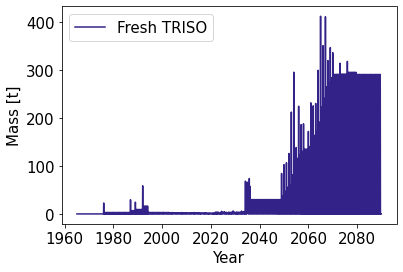

In [78]:
plt.plot(arrive_ar['Year'], mass_received/1000, label='Fresh TRISO', color=mycolors[0])

plt.ylabel('Mass [t]')
plt.xlabel('Year')
plt.legend()

plt.savefig('mass_fresh_triso_supplied.pdf', bbox_inches='tight')

In [79]:
waste = {}
for year in arrive_ar['Year']:
    waste[year] = mass_received[arrive_ar['Year'].to_list().index(year)]*907.185/1000


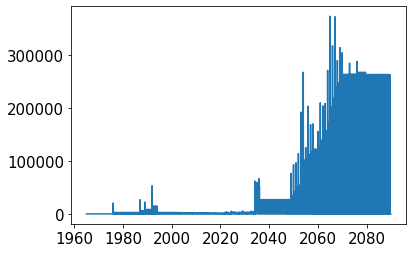

In [80]:
plt.plot(waste.keys(), waste.values())  # double check conversion

In [81]:
elements = 'prism'
masses = waste.copy()
cask_vol = 2  #m^3
vol_prism = 0.0007757  #m^3
mass_prism = 8.06728  #kg

casks_test = waste_calcs.Cask_Calcs(elements,  masses, cask_vol,
                 vol_prism, mass_prism)

With 0.49295146311427196% of a cask filled for the last shipment.


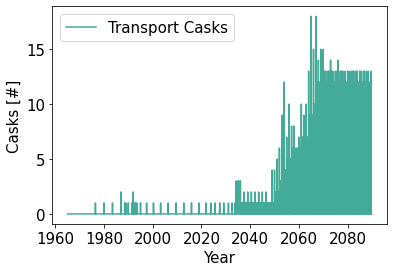

In [82]:
plt.plot(waste.keys(),casks_test.calculate_casks()[0], label='Transport Casks', color=mycolors[2])

plt.ylabel('Casks [#]')
plt.xlabel('Year')
plt.legend()
print(f'With {casks_test.calculate_casks()[1][-1]}% of a cask filled for the last shipment.')

#plt.savefig('num_casks_triso.pdf', bbox_inches='tight')

In [ ]:
fig, ax1 = plt.subplots()

color = mycolors[2]
ax1.set_xlabel('Year')
ax1.set_ylabel('Ships per Time Step [#]', color=color)
ax1.plot(waste.keys(),np.ceil(casks_test.calculate_casks()[0]/8), color=color, label='Time Step')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = mycolors[3]
ax2.set_ylabel('Cumulative Ships [#]', color=color)
ax2.plot(waste.keys(),np.ceil(casks_test.calculate_casks()[0]/8).cumsum(), color=color, label='Cumulative', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.495, 1.07), ncol=2)

plt.savefig('num_ships_triso.png', bbox_inches='tight')

With 0.49295146311427196% of a cask filled for the last shipment.


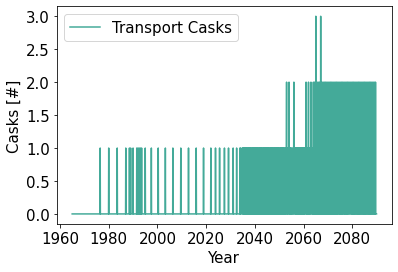

In [92]:
plt.plot(waste.keys(),np.ceil(casks_test.calculate_casks()[0]/8), label='Transport Casks', color=mycolors[2])

plt.ylabel('Casks [#]')
plt.xlabel('Year')
plt.legend()
print(f'With {casks_test.calculate_casks()[1][-1]}% of a cask filled for the last shipment.')

#plt.savefig('num_casks_triso.pdf', bbox_inches='tight')

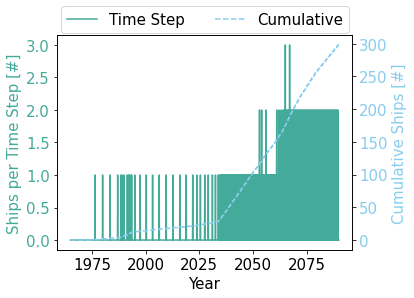

In [98]:
fig, ax1 = plt.subplots()

color = mycolors[2]
ax1.set_xlabel('Year')
ax1.set_ylabel('Ships per Time Step [#]', color=color)
ax1.plot(waste.keys(),np.ceil(casks_test.calculate_casks()[0]/8), color=color, label='Time Step')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = mycolors[3]
ax2.set_ylabel('Cumulative Ships [#]', color=color)
ax2.plot(waste.keys(),np.ceil(casks_test.calculate_casks()[0]/8).cumsum(), color=color, label='Cumulative', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.495, 1.07), ncol=2)

plt.savefig('num_ships_triso.png', bbox_inches='tight')

In [99]:
np.ceil(casks_test.calculate_casks()[0]/8).cumsum()

array([  0.,   0.,   0., ..., 298., 298., 298.])

In [2]:
39.8 * (12 + 8/24) * 298 * 0.4

58511.30666666667

In [4]:
(12 + 8/24)/6224

0.0019815766923736077